In [120]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Dense,Activation
import numpy as np
import random
import matplotlib.pyplot as plt

In [121]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [122]:
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [123]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [124]:
def create_model():
    tf.model = tf.keras.Sequential()
    tf.model.add(tf.keras.layers.Dense(units=10, input_dim=784, activation='softmax'))
    tf.model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(0.001), metrics=['accuracy'])
    return model

model = create_model()

In [125]:
model.fit(x_train, y_train,
          batch_size=64,
          epochs=15,
          validation_data=(x_test, y_test))

Epoch 1/15
938/938 [==============================] - 12s 13ms/step - loss: 0.0024 - accuracy: 0.9865 - val_loss: 0.0030 - val_accuracy: 0.9834
Epoch 2/15
938/938 [==============================] - 11s 12ms/step - loss: 0.0024 - accuracy: 0.9868 - val_loss: 0.0031 - val_accuracy: 0.9831
Epoch 3/15
938/938 [==============================] - 12s 12ms/step - loss: 0.0021 - accuracy: 0.9882 - val_loss: 0.0031 - val_accuracy: 0.9831
Epoch 4/15
938/938 [==============================] - 14s 15ms/step - loss: 0.0024 - accuracy: 0.9868 - val_loss: 0.0031 - val_accuracy: 0.9827
Epoch 5/15
938/938 [==============================] - 13s 14ms/step - loss: 0.0022 - accuracy: 0.9876 - val_loss: 0.0030 - val_accuracy: 0.9836
Epoch 6/15
938/938 [==============================] - 14s 15ms/step - loss: 0.0024 - accuracy: 0.9863 - val_loss: 0.0031 - val_accuracy: 0.9835
Epoch 7/15
938/938 [==============================] - 13s 14ms/step - loss: 0.0022 - accuracy: 0.9876 - val_loss: 0.0032 - val_accuracy:

In [126]:
print("perturbation 적용 전 정확도:", model.evaluate(x=x_test, y=y_test, verbose=0))

perturbation 적용 전 정확도: [0.0032269833609461784, 0.982699990272522]


In [127]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    return signed_grad
        

In [139]:
image = x_train[2]
image_label = y_train[2]

In [140]:
perturbations = adversarial_pattern(image.reshape((1, 28, 28, 1)), image_label).numpy()

In [141]:
adversarial = image + perturbations * 0.25

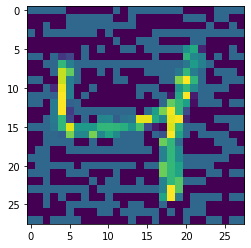

In [147]:
plt.imshow(adversarial.reshape((28, 28)))
plt.show()

In [148]:
print(labels[model.predict(image.reshape((1, 28, 28, 1))).argmax()])
print(labels[model.predict(adversarial).argmax()])

four
eight
